**K Mean Clustering** is an ML method based on unsupervised learning that will try to group your data into groups based on similar characteristics

Its main applications are:
* Automatic document group
* Group a customers
* Market segamentation
* Geostatistics

The main objective is to divide the data into K distinct groups based on the parameters

## The algorithm

* Choose a number of K groups (cluster)
* Randomly set a class for all poins
* Until the clusters stop changing, do:
    * For each cluster, obtain its centroid by averaging the cluster's point vectors.
    * Set each point to the cluster at which the centroid is closest.

# Imports

In [8]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

from sklearn.cluster         import KMeans
from sklearn.metrics         import classification_report, confusion_matrix
from sklearn.datasets        import make_blobs

%matplotlib inline

In [2]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=50)

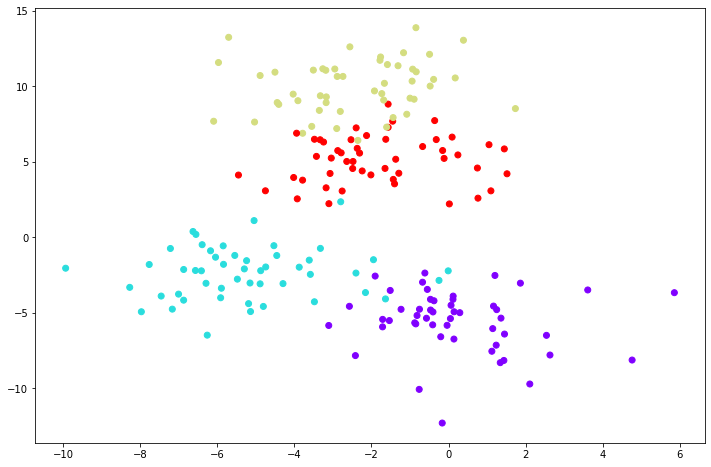

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow');

In [28]:
# Treinando o modelo
kmeans = KMeans(n_clusters=4)

In [29]:
kmeans.fit(data[0])

KMeans(n_clusters=4)

In [30]:
kmeans.cluster_centers_

array([[-2.37178661, 10.27788487],
       [ 0.11584155, -5.37562512],
       [-5.64892498, -2.38445033],
       [-1.94847438,  5.20472404]])

In [31]:
kmeans.labels_

array([0, 1, 3, 0, 2, 1, 0, 1, 1, 2, 2, 0, 2, 3, 2, 3, 0, 0, 2, 2, 2, 3,
       0, 0, 0, 3, 0, 1, 3, 0, 0, 2, 2, 1, 1, 2, 2, 2, 3, 3, 0, 2, 3, 3,
       1, 1, 0, 3, 3, 0, 1, 2, 3, 0, 3, 3, 1, 2, 2, 3, 1, 1, 0, 1, 1, 0,
       1, 3, 0, 0, 1, 2, 3, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 2, 2, 0, 1,
       0, 2, 1, 0, 1, 3, 3, 2, 1, 3, 1, 3, 2, 1, 3, 0, 3, 1, 3, 1, 2, 0,
       1, 2, 0, 0, 2, 3, 0, 0, 3, 1, 0, 3, 0, 0, 1, 0, 0, 3, 3, 1, 2, 1,
       1, 3, 0, 3, 1, 0, 0, 2, 0, 3, 3, 1, 2, 0, 1, 3, 1, 2, 0, 2, 3, 1,
       1, 3, 0, 1, 1, 1, 3, 3, 1, 1, 2, 2, 2, 3, 1, 1, 1, 1, 2, 3, 1, 3,
       2, 1, 0, 3, 1, 3, 3, 0, 2, 1, 2, 0, 3, 1, 3, 3, 2, 3, 1, 0, 2, 3,
       2, 0], dtype=int32)

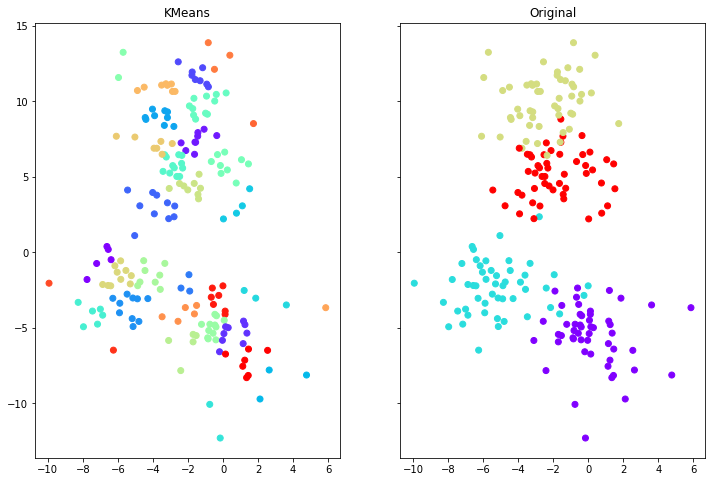

In [27]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12,8))
ax1.set_title('KMeans')
ax1.scatter(data[0][:,0], data[0][:,1], c=kmeans.labels_, cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow');